In [1]:
# import the libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import the datset
df = pd.read_csv("Google-Playstore.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [6]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


# Clean the Dataset for Columns

In [7]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [8]:
# This data contain MB, KBs, GBs
# Correct this size and convert this only to MB 
df['Size'] = df['Size'].str.replace('M', '000000')
df['Size'] = df['Size'].str.replace('k', '000')
df['Size'] = df['Size'].str.replace('G', '000000000')

In [9]:
df['Size'] = pd.to_numeric(df['Size'] , errors='coerce')

In [10]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [11]:
# Check this missing values
df.isnull().sum()

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                  75961
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [12]:
# Fill this missing values in Size columns
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [13]:
# So Size column convert into MB and divided by 1000000 
#df['Size'] = df['Size']/1000000

In [14]:
df['Size'] = df['Size'].apply(lambda x: x/1000000)

In [15]:
df['Size'].unique()

array([1.00e+01, 2.90e-06, 3.70e-06, ..., 9.10e+02, 4.05e+02, 5.12e+02])

In [16]:
# Dealing with installs column
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

In [17]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10,10.0,15,True,0.0,USD,10.000000,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000,5000.0,7662,True,0.0,USD,0.000003,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50,50.0,58,True,0.0,USD,0.000004,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10,10.0,19,True,0.0,USD,0.000002,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100,100.0,478,True,0.0,USD,0.000006,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [18]:
df.tail()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,100000,100000.0,337109,True,0.0,USD,77.000000,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100,100.0,430,True,0.0,USD,44.000000,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100,100.0,202,True,0.0,USD,29.000000,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000,1000.0,2635,True,0.0,USD,10.000000,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19
2312943,Biliyor Musun - Sonsuz Yarış,com.yyazilim.biliyormusun,Trivia,5.0,12.0,100,100.0,354,True,0.0,USD,0.000005,5.0 and up,Y Yazılım,NaN,yyazilimdevelop@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://biliyor-musun-sons.flycricket.io/priva...,True,False,False,2021-06-16 12:59:19


In [19]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', nan, 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [20]:
df['Currency'].value_counts()

Currency
USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: count, dtype: int64

<Axes: xlabel='Currency', ylabel='count'>

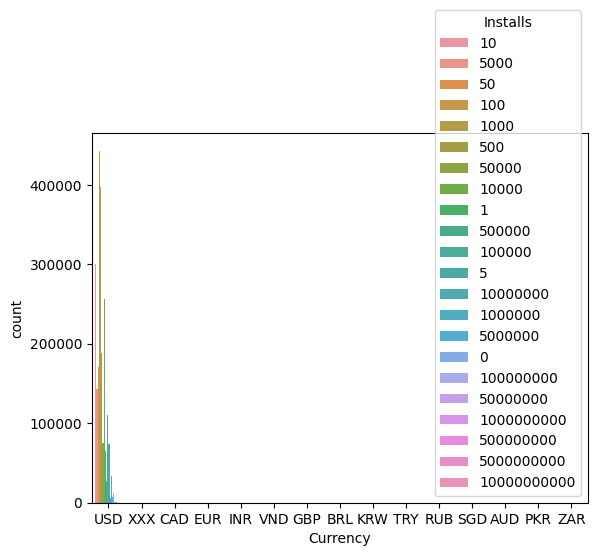

In [21]:
# count plot of Currency and number of installs
sns.countplot(x='Currency', hue='Installs', data=df)

In [22]:
# Slect only USD Currency
df_usd = df[df['Currency'] == 'USD']

#  Select Necessary Columns

In [23]:
df['Category'].value_counts()

Category
Education                  241090
Music & Audio              154906
Tools                      143988
Business                   143771
Entertainment              138276
Lifestyle                  118331
Books & Reference          116728
Personalization             89210
Health & Fitness            83510
Productivity                79698
Shopping                    75256
Food & Drink                73927
Travel & Local              67288
Finance                     65466
Arcade                      53792
Puzzle                      51168
Casual                      50813
Communication               48167
Sports                      47483
Social                      44734
News & Magazines            42807
Photography                 35552
Medical                     32065
Action                      27555
Maps & Navigation           26722
Simulation                  23282
Adventure                   23203
Educational                 21308
Art & Design                18539
Auto 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Education'),
  Text(1, 0, 'Music & Audio'),
  Text(2, 0, 'Tools'),
  Text(3, 0, 'Business'),
  Text(4, 0, 'Entertainment'),
  Text(5, 0, 'Lifestyle'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Personalization'),
  Text(8, 0, 'Health & Fitness'),
  Text(9, 0, 'Productivity')])

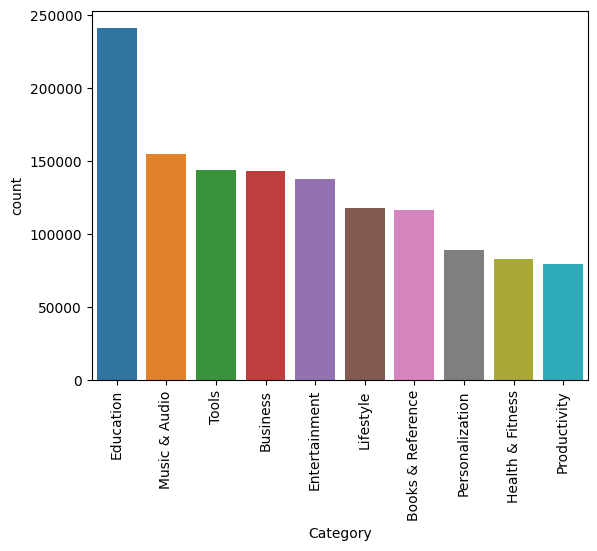

In [24]:
# Make a plot of top 10 category   
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().iloc[:10].index)
# rotat X-ticks 90 degree
plt.xticks(rotation=90)

In [25]:
df['Installs'] = df['Installs'].astype(float)



In [26]:
# if we want to have top 10 categories based on the number of install
df_top10_install = df.groupby('Category', as_index=False)['Installs'].sum().sort_values(by='Installs', ascending=False).head(10)
df_top10_install

,Category,Installs
42,Tools,7.144047e+10
13,Communication,4.321659e+10
33,Productivity,2.831405e+10
32,Photography,1.899896e+10
45,Video Players & Editors,1.859115e+10
0,Action,1.740038e+10
39,Social,1.716600e+10
17,Entertainment,1.710851e+10
11,Casual,1.683707e+10
2,Arcade,1.450133e+10


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Tools'),
  Text(1, 0, 'Communication'),
  Text(2, 0, 'Productivity'),
  Text(3, 0, 'Photography'),
  Text(4, 0, 'Video Players & Editors'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Social'),
  Text(7, 0, 'Entertainment'),
  Text(8, 0, 'Casual'),
  Text(9, 0, 'Arcade')])

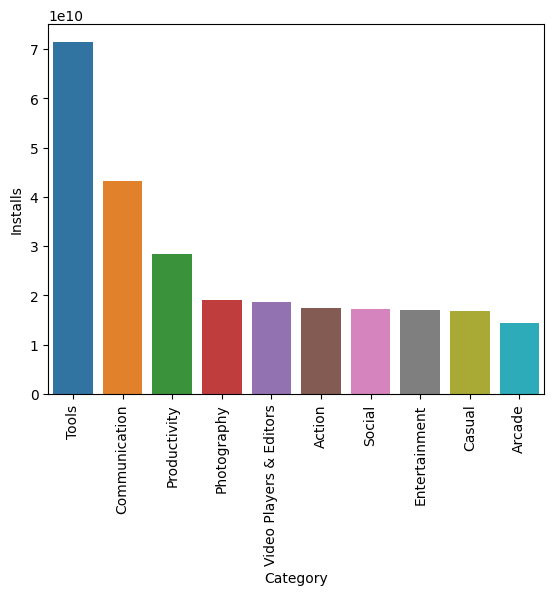

In [27]:
# create a plot of top 10 categories based on the number of install
sns.barplot(x='Category', y='Installs', data=df_top10_install, order=df_top10_install['Category'].tolist())

# rotate X-ticks 90 degree
plt.xticks(rotation=90)

In [28]:
# find duplicates from the data (based on unique IDs)
df.duplicated(subset=['App Id']).sum()

0

In [29]:
# Divid rating into 4 categories (kids, Teenages, Adults, and Everyone)
df['Rating'].unique()
 # Create a new column based on the rating
df['Rating'] = pd.cut(df['Rating'], bins=[0, 2, 4, 6, 8], labels=['kids', 'teenages', 'adults', 'everyone'])

df['Rating'].unique()



[NaN, 'adults', 'kids', 'teenages']
Categories (4, object): ['kids' < 'teenages' < 'adults' < 'everyone']

Top five categories of free and paid apps
Top five categories of paid apps  based on the rating
Chooze only necesaaey columns


In [30]:
# check this missing values
df.isnull().sum()

App Name                   5
App Id                     0
Category                   0
Rating               1082645
Rating Count           22883
Installs                 107
Minimum Installs         107
Maximum Installs           0
Free                       0
Price                      0
Currency                 135
Size                       0
Minimum Android         6530
Developer Id              33
Developer Website     760835
Developer Email           31
Released               71053
Last Updated               0
Content Rating             0
Privacy Policy        420953
Ad Supported               0
In App Purchases           0
Editors Choice             0
Scraped Time               0
dtype: int64

In [31]:
df['Free'].unique()

array([ True, False])

In [32]:
df['Price'].unique()

array([ 0.      ,  1.99    ,  4.99    , ...,  3.041816, 26.746362,
       18.903596])

In [35]:
df.Free.value_counts()/ len(df) * 100

Free
True     98.051488
False     1.948512
Name: count, dtype: float64

In [33]:
df.Price.value_counts()

Price
0.000000     2268011
0.990000       11851
1.990000        5817
2.990000        3921
1.490000        3823
              ...   
8.205856           1
1.030097           1
13.530000          1
3.550000           1
18.903596          1
Name: count, Length: 1063, dtype: int64

In [36]:
df.describe()

,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Size
count,2.290061e+06,2.312837e+06,2.312837e+06,2.312944e+06,2.312944e+06,2.312944e+06
mean,2.864839e+03,1.834452e+05,1.834452e+05,3.202017e+05,1.034992e-01,1.670692e+01
std,2.121626e+05,1.513144e+07,1.513144e+07,2.355495e+07,2.633127e+00,2.495284e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06
25%,0.000000e+00,5.000000e+01,5.000000e+01,8.400000e+01,0.000000e+00,5.300000e-06
50%,6.000000e+00,5.000000e+02,5.000000e+02,6.950000e+02,0.000000e+00,1.100000e+01
75%,4.200000e+01,5.000000e+03,5.000000e+03,7.354000e+03,0.000000e+00,2.400000e+01
max,1.385576e+08,1.000000e+10,1.000000e+10,1.205763e+10,4.000000e+02,9.960000e+02


# convert these price into groups or bins with following range:
1. Free - 0
2. Low - >0 and <=5
3. Medium - >5 and <=10
4. High - >10 and <=50
5. very high - >50 and <=100
6. Expensive - >100

In [42]:
# Price columns convert the bins
df['Price_groups'] = pd.cut(df['Price'], bins=[-1, 0, 5, 10, 50, 100, 400], labels=['Free', 'Low', 'Medium', 'High', 'Very High', 'Expensive'])

In [43]:
df['Price_groups'].value_counts()

Price_groups
Free         2268011
Low            36683
Medium          5308
High            2473
Very High        285
Expensive        184
Name: count, dtype: int64

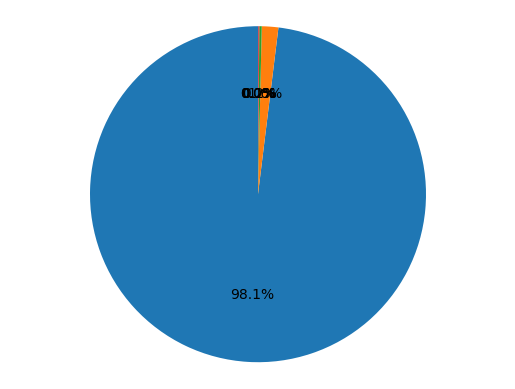

In [46]:
# Make a pie chart of value counts of price groups 
plt.pie(df['Price_groups'].value_counts(), autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.show()


In [47]:
# Plot the same thing with plotly
import plotly.graph_objs as go

fig = go.Figure(data=[go.Pie(labels=df['Price_groups'].value_counts().index, values=df['Price_groups'].value_counts().values)])

fig.show()

c:\Users\Kashif\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='Price_groups', ylabel='Installs'>

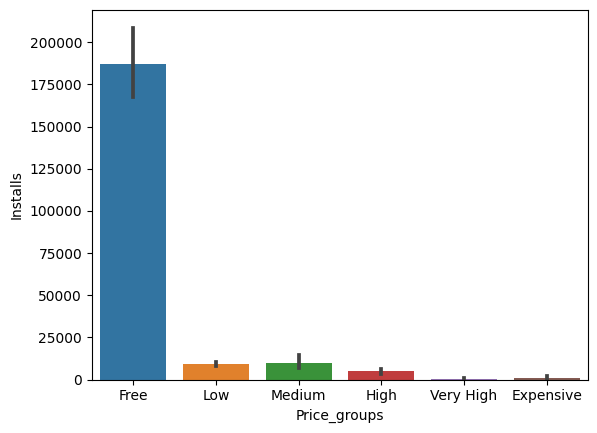

In [48]:
# number of install based on the price groups, make a plot with both columns
sns.barplot(x='Price_groups', y='Installs', data=df)

In [49]:
# Make the same plot with plotly
import plotly.graph_objs as go
fig = go.Figure(data=[go.Bar(x=df['Price_groups'].value_counts().index, y=df['Price_groups'].value_counts().values)])
fig.show()